In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

In [0]:
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Activation, Flatten, Dropout
from random import randint

In [0]:
directory = '/content/gdrive/My Drive/Colab Notebooks/face_expression_recognition_data/fer2013.csv.zip'

zf = zipfile.ZipFile(directory, 'r')

df = pd.read_csv(zf.open('fer2013.csv'))

In [5]:
# dataframe representation

print('\n\ndata in csv file looks like:\n\n')
print(df.head())
print('\n\n')

print('0 = Angry\n1 = Disgust\n2 = Fear\n3 = Happy\n4 = Sad\n5 = Surprise\n6 = Neutral\n\n')

print('Usage:')
print(df['Usage'].unique())
print('\n')

print('total number of data: ' + str(len(df)) + '\n\n')
print('total number of training data: ' + str(len(df[df['Usage'] == 'Training'])) + '\n\n')



data in csv file looks like:


   emotion                                             pixels     Usage
0        0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...  Training
1        0  151 150 147 155 148 133 111 140 170 174 182 15...  Training
2        2  231 212 156 164 174 138 161 173 182 200 106 38...  Training
3        4  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...  Training
4        6  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...  Training



0 = Angry
1 = Disgust
2 = Fear
3 = Happy
4 = Sad
5 = Surprise
6 = Neutral


Usage:
['Training' 'PublicTest' 'PrivateTest']


total number of data: 35887


total number of training data: 28709




In [6]:
def reshape_function(img_str):
    img = [int(x) for x in img_str.split(' ')]
    img = np.array(img).reshape((48, 48, 1))
    return img

df['pixels'] = df['pixels'].apply(reshape_function)
print(df['pixels'][0].shape)

def one_hot_vector(a):
    b = np.zeros(7)
    b[a] = 1
    return b

df['emotion'] = df['emotion'].apply(one_hot_vector)
print(df['emotion'][0].shape)

(48, 48, 1)
(7,)


In [12]:
x_train = []
y_train = []
x_test = []
y_test = []

train_df = df[df['Usage'] == 'Training']
test_df = df[df['Usage'] != 'Training']


for i in train_df['pixels']:
    x_train.append(i)
for i in train_df['emotion']:
    y_train.append(i)
    
for i in test_df['pixels']:
    x_test.append(i)
for i in test_df['emotion']:
    y_test.append(i)

    
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)


print('\n\nx_train shape:')
print(y_train.shape)
print('\n')



x_train shape:
<class 'tuple'>




In [0]:
angry_data = []
disgust_data = []
fear_data = []
happy_data = []
sad_data = []
surprise_data = []
neutral_data = []

# expression_data = [index in train_df, emotion, pixels, Usage]
# obviously Usage is 'Training'

angry_data = [[i, train_df.iloc[i, 0], train_df.iloc[i, 1], train_df.iloc[i, 2]]  for i in range(len(train_df)) if train_df.iloc[i, 0][0] == 1]
disgust_data = [[i, train_df.iloc[i, 0], train_df.iloc[i, 1], train_df.iloc[i, 2]]  for i in range(len(train_df)) if train_df.iloc[i, 0][1] == 1]
fear_data = [[i, train_df.iloc[i, 0], train_df.iloc[i, 1], train_df.iloc[i, 2]]  for i in range(len(train_df)) if train_df.iloc[i, 0][2] == 1]
happy_data = [[i, train_df.iloc[i, 0], train_df.iloc[i, 1], train_df.iloc[i, 2]]  for i in range(len(train_df)) if train_df.iloc[i, 0][3] == 1]
sad_data = [[i, train_df.iloc[i, 0], train_df.iloc[i, 1], train_df.iloc[i, 2]]  for i in range(len(train_df)) if train_df.iloc[i, 0][4] == 1]
surprise_data = [[i, train_df.iloc[i, 0], train_df.iloc[i, 1], train_df.iloc[i, 2]]  for i in range(len(train_df)) if train_df.iloc[i, 0][5] == 1]
neutral_data = [[i, train_df.iloc[i, 0], train_df.iloc[i, 1], train_df.iloc[i, 2]]  for i in range(len(train_df)) if train_df.iloc[i, 0][6] == 1]


number_of_images = 5

angry examples:


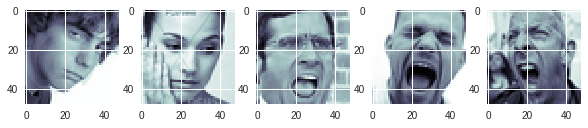


total number of angry samples:3995

fraction of this expression : 13.92%


In [0]:
fig_angry=plt.figure(figsize=(number_of_images * 2, number_of_images * 2))

print('angry examples:')
for j in range(number_of_images):
    random_id = randint(0, len(angry_data))
    temp = fig_angry.add_subplot(number_of_images, number_of_images, j + 1)
    temp.imshow(angry_data[random_id][2].reshape((48, 48)), cmap='bone')
plt.show()

print('\ntotal number of angry samples:' + str(len(angry_data)))
print('\nfraction of this expression : ' + "{0:.2f}".format(100 * len(angry_data) / len(x_train)) + '%')

disgust examples:


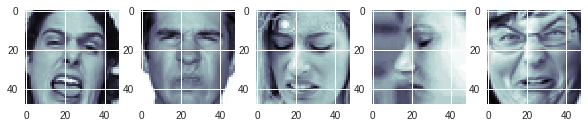


total number of disgust samples:436

fraction of this expression : 1.52%


In [0]:
fig_disgust=plt.figure(figsize=(number_of_images * 2, number_of_images * 2))

print('disgust examples:')
for j in range(number_of_images):
    random_id = randint(0, len(disgust_data))
    temp = fig_disgust.add_subplot(number_of_images, number_of_images, j + 1)
    temp.imshow(disgust_data[random_id][2].reshape((48, 48)), cmap='bone')
plt.show()

print('\ntotal number of disgust samples:' + str(len(disgust_data)))
print('\nfraction of this expression : ' + "{0:.2f}".format(100 * len(disgust_data) / len(x_train)) + '%')

fear examples:


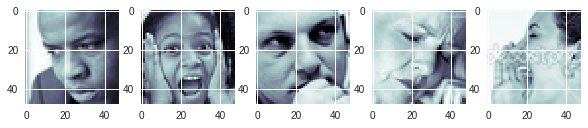


total number of fear samples:4097

fraction of this expression : 14.27%


In [0]:
fig_fear=plt.figure(figsize=(number_of_images * 2, number_of_images * 2))

print('fear examples:')
for j in range(number_of_images):
    random_id = randint(0, len(fear_data))
    temp = fig_fear.add_subplot(number_of_images, number_of_images, j + 1)
    temp.imshow(fear_data[random_id][2].reshape((48, 48)), cmap='bone')
plt.show()

print('\ntotal number of fear samples:' + str(len(fear_data)))
print('\nfraction of this expression : ' + "{0:.2f}".format(100 * len(fear_data) / len(x_train)) + '%')

happy examples:


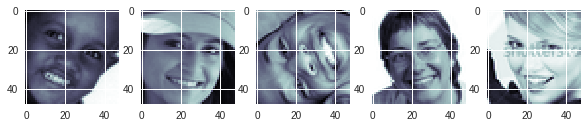


total number of happy samples:7215

fraction of this expression : 25.13%


In [0]:
fig_happy=plt.figure(figsize=(number_of_images * 2, number_of_images * 2))

print('happy examples:')
for j in range(number_of_images):
    random_id = randint(0, len(happy_data))
    temp = fig_happy.add_subplot(number_of_images, number_of_images, j + 1)
    temp.imshow(happy_data[random_id][2].reshape((48, 48)), cmap='bone')
plt.show()

print('\ntotal number of happy samples:' + str(len(happy_data)))
print('\nfraction of this expression : ' + "{0:.2f}".format(100 * len(happy_data) / len(x_train)) + '%')

sad examples:


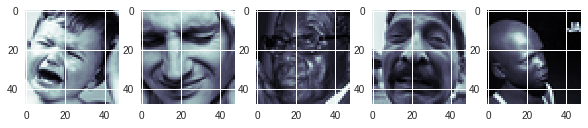


total number of sad samples:4830

fraction of this expression : 16.82%


In [0]:
fig_sad=plt.figure(figsize=(number_of_images * 2, number_of_images * 2))

print('sad examples:')
for j in range(number_of_images):
    random_id = randint(0, len(sad_data))
    temp = fig_sad.add_subplot(number_of_images, number_of_images, j + 1)
    temp.imshow(sad_data[random_id][2].reshape((48, 48)), cmap='bone')
plt.show()

print('\ntotal number of sad samples:' + str(len(sad_data)))
print('\nfraction of this expression : ' + "{0:.2f}".format(100 * len(sad_data) / len(x_train)) + '%')

surprise examples:


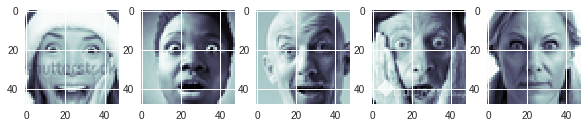


total number of surprise samples:3171

fraction of this expression : 11.05%


In [0]:
fig_surprise=plt.figure(figsize=(number_of_images * 2, number_of_images * 2))

print('surprise examples:')
for j in range(number_of_images):
    random_id = randint(0, len(surprise_data))
    temp = fig_surprise.add_subplot(number_of_images, number_of_images, j + 1)
    temp.imshow(surprise_data[random_id][2].reshape((48, 48)), cmap='bone')
plt.show()

print('\ntotal number of surprise samples:' + str(len(surprise_data)))
print('\nfraction of this expression : ' + "{0:.2f}".format(100 * len(surprise_data) / len(x_train)) + '%')

neutral examples:


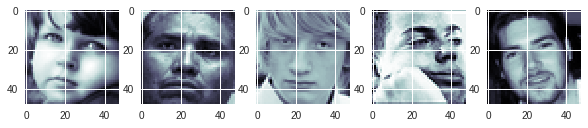


total number of neutral samples:4965

fraction of this expression : 17.29%


In [0]:
fig_neutral=plt.figure(figsize=(number_of_images * 2, number_of_images * 2))

print('neutral examples:')
for j in range(number_of_images):
    random_id = randint(0, len(neutral_data))
    temp = fig_neutral.add_subplot(number_of_images, number_of_images, j + 1)
    temp.imshow(neutral_data[random_id][2].reshape((48, 48)), cmap='bone')
plt.show()

print('\ntotal number of neutral samples:' + str(len(neutral_data)))
print('\nfraction of this expression : ' + "{0:.2f}".format(100 * len(neutral_data) / len(x_train)) + '%')

In [10]:
model = Sequential()

model.add(Conv2D(16,(3,3), input_shape=(48, 48,1)))
model.add(Activation('relu'))

model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(128,(3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(7)) # number of classes is 7
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(x_train, y_train, batch_size=64, epochs=7)

Epoch 1/7
28709/28709 [==============================] - 10s 363us/step - loss: 1.7754 - accuracy: 0.3431
Epoch 2/7
28709/28709 [==============================] - 4s 136us/step - loss: 1.4065 - accuracy: 0.4634
Epoch 3/7
28709/28709 [==============================] - 4s 135us/step - loss: 1.2790 - accuracy: 0.5168
Epoch 4/7
28709/28709 [==============================] - 4s 136us/step - loss: 1.1880 - accuracy: 0.5496
Epoch 5/7
28709/28709 [==============================] - 4s 135us/step - loss: 1.1083 - accuracy: 0.5819
Epoch 6/7
28709/28709 [==============================] - 4s 142us/step - loss: 1.0376 - accuracy: 0.6097
Epoch 7/7
28709/28709 [==============================] - 4s 141us/step - loss: 0.9633 - accuracy: 0.6351


In [0]:
score = model.evaluate(x_test, y_test)

print('\n\ntotal score without considering unbalanced data:')
print(score)
print('\n')

7178/7178 [==============================] - 1s 188us/step


total score without considering unbalanced data:
[1.1761725999811428, 0.5685427695820012]




In [0]:
classes = {0:'angry', 1:'disgust', 2:'fear', 3:'happy', 4:'sad', 5:'surprise', 6:'neutral'}

predictions_for_happy = model.predict_classes(np.array(happy_data[0][2].reshape(1, 48, 48, 1)))
probabality_for_happy = model.predict_proba(np.array(happy_data[0][2].reshape(1, 48, 48, 1)))
print(classes[predictions_for_happy[0]])
print(probabality_for_happy[0][predictions_for_happy[0]])
print(predictions_for_happy[0])

happy
0.9710263
3


In [0]:
happiness = []
for i in range(len(happy_data)):
    probabality_for_happy = model.predict_proba(np.array(happy_data[i][2].reshape(1, 48, 48, 1)))
    happiness.append(probabality_for_happy[0][3])

# print number of images with less than 0.01, 0.1, 0.3 predicted value
# do this for all classes
    

print(sorted(happiness))



[0.0036297166, 0.008914857, 0.010068877, 0.011462444, 0.012122293, 0.013218491, 0.013704395, 0.018086454, 0.01834645, 0.019323384, 0.021644263, 0.02315274, 0.023591807, 0.024277417, 0.024569795, 0.024641756, 0.025581136, 0.027793668, 0.028255943, 0.029593237, 0.029826997, 0.030409295, 0.030706836, 0.03452714, 0.035606407, 0.03601545, 0.036423907, 0.036807463, 0.037414256, 0.037653655, 0.039104685, 0.0397627, 0.040492143, 0.041398793, 0.04172696, 0.04209261, 0.042322434, 0.04446503, 0.04611935, 0.048759278, 0.04929668, 0.05107156, 0.051278528, 0.053501196, 0.054360013, 0.055148754, 0.05613591, 0.056737874, 0.056813594, 0.057896256, 0.058128487, 0.058580104, 0.05877459, 0.05911209, 0.06055745, 0.06087046, 0.06129524, 0.06294852, 0.06494827, 0.0651759, 0.065235145, 0.06550821, 0.065552145, 0.06730841, 0.06888093, 0.069813095, 0.07071478, 0.07084112, 0.07116011, 0.07190217, 0.07226118, 0.07271767, 0.0745323, 0.07511121, 0.075725384, 0.076992616, 0.077207014, 0.07728647, 0.0774319, 0.078095

In [0]:
c_1 = 0
c_2 = 0
c_3 = 0
for i in range(len(happy_data)):
    probabality_for_happy = model.predict_proba(np.array(happy_data[i][2].reshape(1, 48, 48, 1)))
    if probabality_for_happy[0][3] < 0.01:
        c_1 += 1
        c_2 += 1
        c_3 += 1
    elif probabality_for_happy[0][3] < 0.1:
        c_2 += 1
        c_3 += 1
    elif probabality_for_happy[0][3] < 0.3:
        c_3 += 1
print('\ntotal number images with predicted value less than 0.01 : ' + str(c_1))
print('\ntotal number images with predicted value less than 0.1 : ' + str(c_2))
print('\ntotal number images with predicted value less than 0.3 : ' + str(c_3))


total number images with predicted value less than 0.01 : 2

total number images with predicted value less than 0.1 : 113

total number images with predicted value less than 0.3 : 532
